In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("./dataset/Train_UWu5bXk.csv")

In [3]:
test=pd.read_csv("./dataset/Test_u94Q5KV.csv")

In [4]:
train.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
mean_value=train['Item_Weight'].mean()
train['Item_Weight']=train['Item_Weight'].fillna(mean_value)

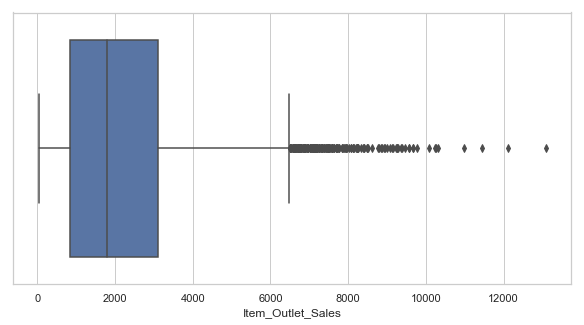

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x=train.Item_Outlet_Sales)

In [9]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [10]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [11]:
print("Seeing number of null values in testing dataset")
print(pd.isnull(train).sum())

Seeing number of null values in testing dataset
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [12]:
train['Item_Weight'].max()

21.35

In [13]:
train['Item_Weight'].min()

4.555

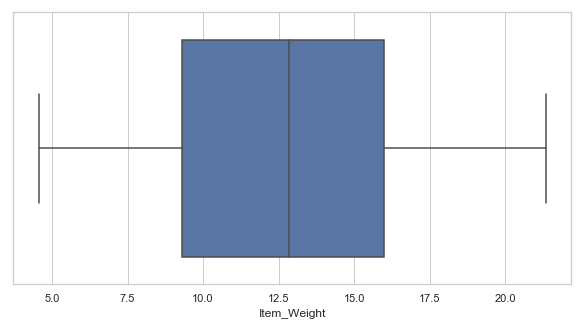

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x=train.Item_Weight)

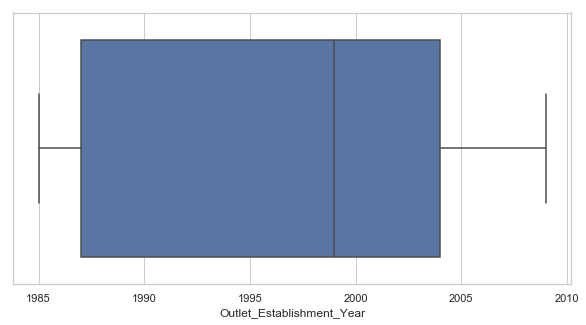

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x=train.Outlet_Establishment_Year)

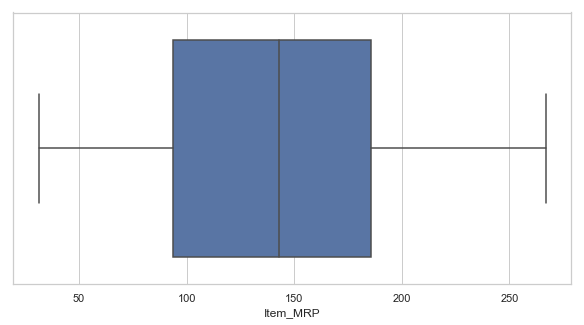

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x=train.Item_MRP)

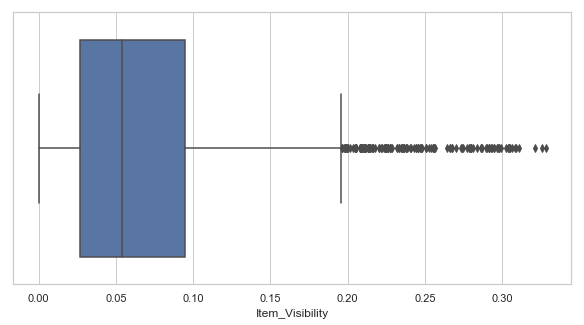

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x=train.Item_Visibility)

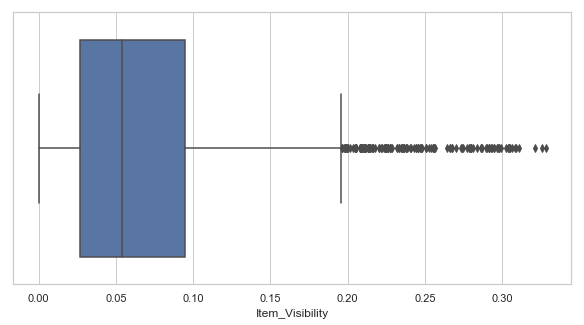

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x=train.Item_Visibility[train.Item_Visibility < 2.3])

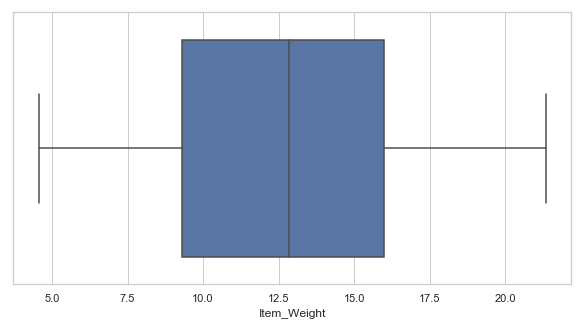

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x=train.Item_Weight)

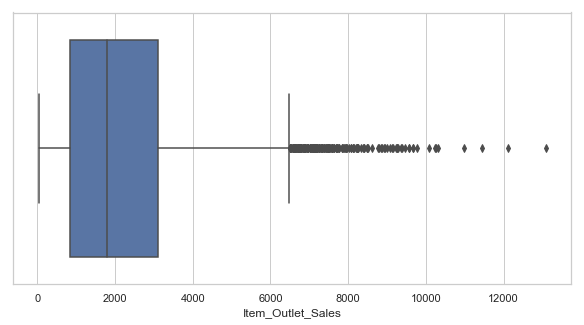

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x=train.Item_Outlet_Sales)

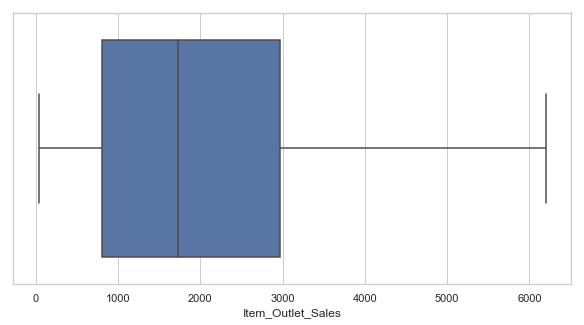

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x=train.Item_Outlet_Sales[train.Item_Outlet_Sales<6200])

In [22]:
train.Item_Fat_Content.value_counts() 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
train.Outlet_Size.value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [24]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [25]:
train.Item_Identifier.value_counts()

FDG33    10
FDW13    10
NCB18     9
FDX31     9
FDX04     9
NCF42     9
FDQ40     9
FDW49     9
FDV60     9
FDP25     9
NCJ30     9
FDU12     9
FDF52     9
FDG09     9
DRN47     9
FDW26     9
DRE49     9
FDD38     9
FDO19     9
NCI54     9
FDV38     9
NCY18     9
FDF56     9
FDT07     9
FDX20     9
NCQ06     9
NCL31     9
NCV06     8
FDX21     8
NCQ05     8
         ..
FDW10     2
FDR57     2
FDW58     2
DRI59     2
FDB10     2
NCV18     2
FDM16     2
DRG25     2
FDU43     2
FDD22     2
DRL59     2
NCW30     2
FDG28     2
FDR03     2
FDU09     2
DRE01     2
NCX53     2
NCM42     2
NCS41     2
FDP15     2
FDE38     2
FDQ60     1
FDE52     1
FDO33     1
FDY43     1
FDT35     1
FDC23     1
FDK57     1
FDN52     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [26]:
train.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [27]:
train['Item_Fat_Content'].replace(to_replace ="reg", 
                 value ="Regular",inplace=True) 

In [28]:
train.Item_Fat_Content.value_counts() 

Low Fat    5089
Regular    3006
LF          316
low fat     112
Name: Item_Fat_Content, dtype: int64

In [29]:
train['Item_Fat_Content'].replace(to_replace ="low fat", 
                 value ="Low Fat",inplace=True) 

In [30]:
train.Item_Fat_Content.value_counts()

Low Fat    5201
Regular    3006
LF          316
Name: Item_Fat_Content, dtype: int64

In [31]:
train['Item_Fat_Content'].replace(to_replace ="LF", 
                 value ="Low Fat",inplace=True) 

In [32]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [33]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [34]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [35]:
train.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

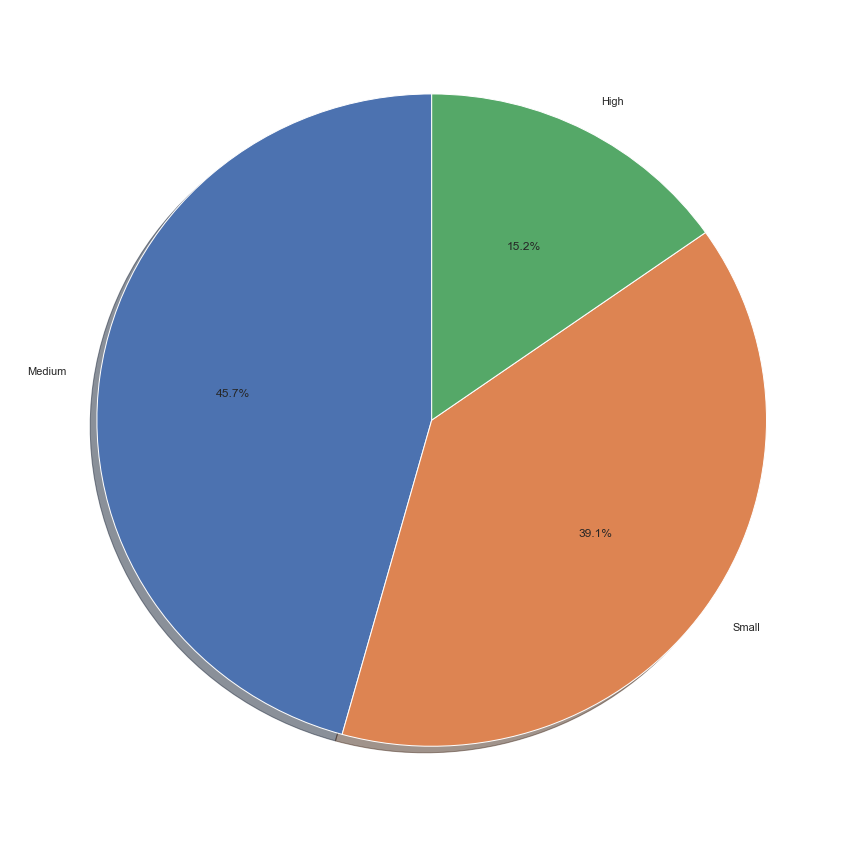

In [36]:
plt.figure(figsize=(15,15))
labels = list(train.Outlet_Size.value_counts().index)
data = train.Outlet_Size.value_counts()
plt.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

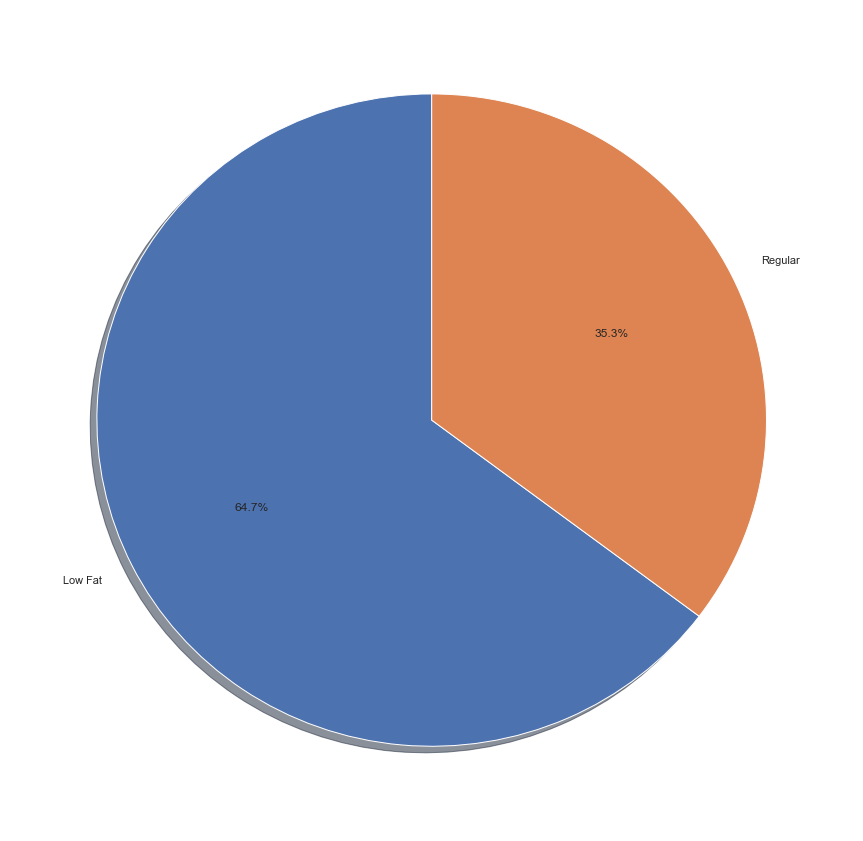

In [37]:
plt.figure(figsize=(15,15))
labels = list(train.Item_Fat_Content.value_counts().index)
data = train.Item_Fat_Content.value_counts()
plt.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

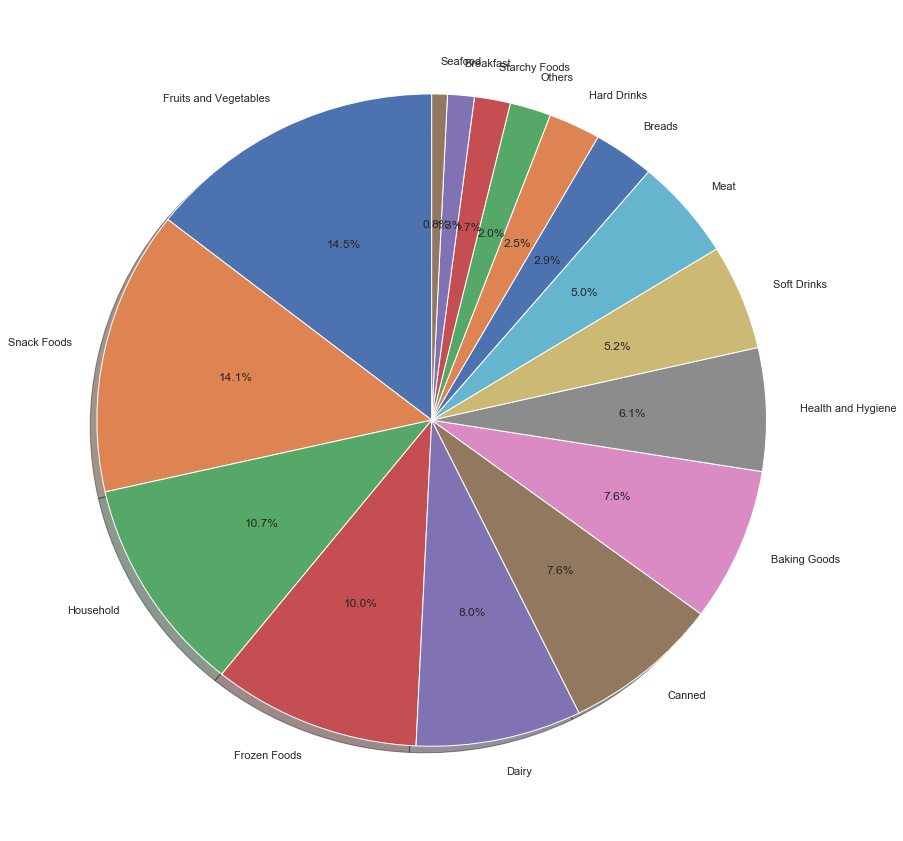

In [38]:
plt.figure(figsize=(15,15))
labels = list(train.Item_Type.value_counts().index)
data = train.Item_Type.value_counts()
plt.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

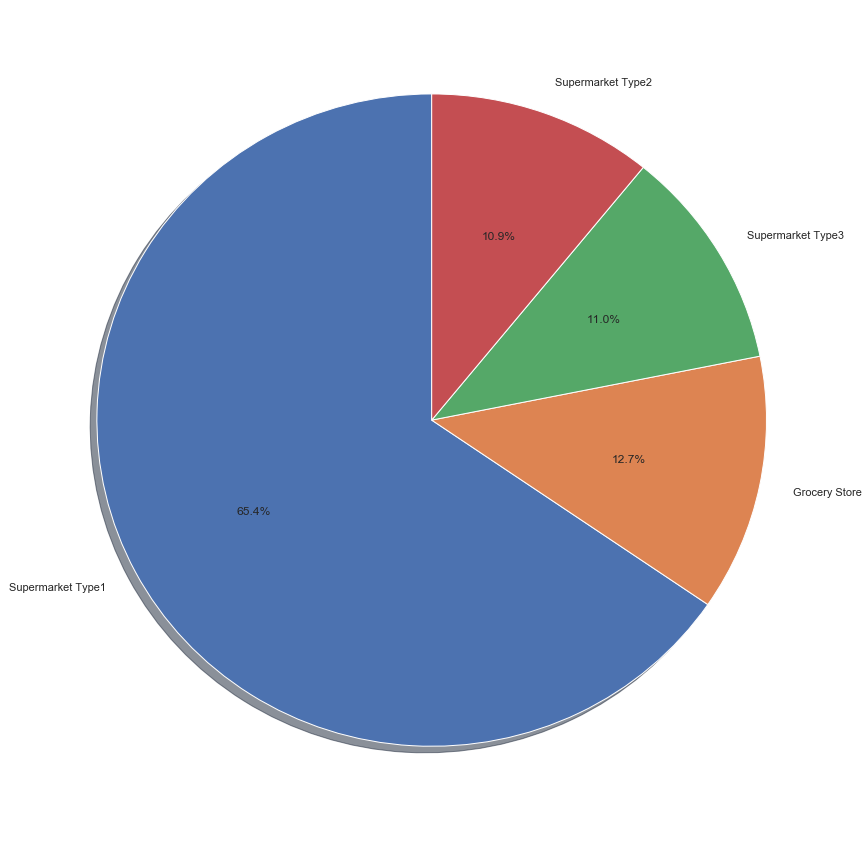

In [39]:
plt.figure(figsize=(15,15))
labels = list(train.Outlet_Type.value_counts().index)
data = train.Outlet_Type.value_counts()
plt.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

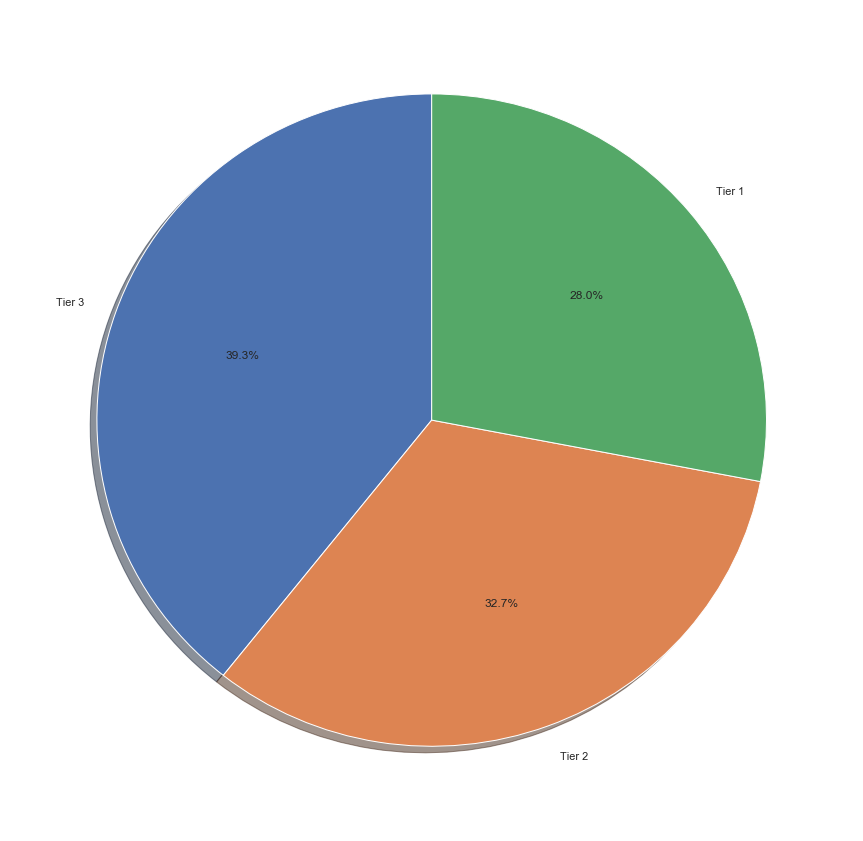

In [40]:
plt.figure(figsize=(15,15))
labels = list(train.Outlet_Location_Type.value_counts().index)
data = train.Outlet_Location_Type.value_counts()
plt.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


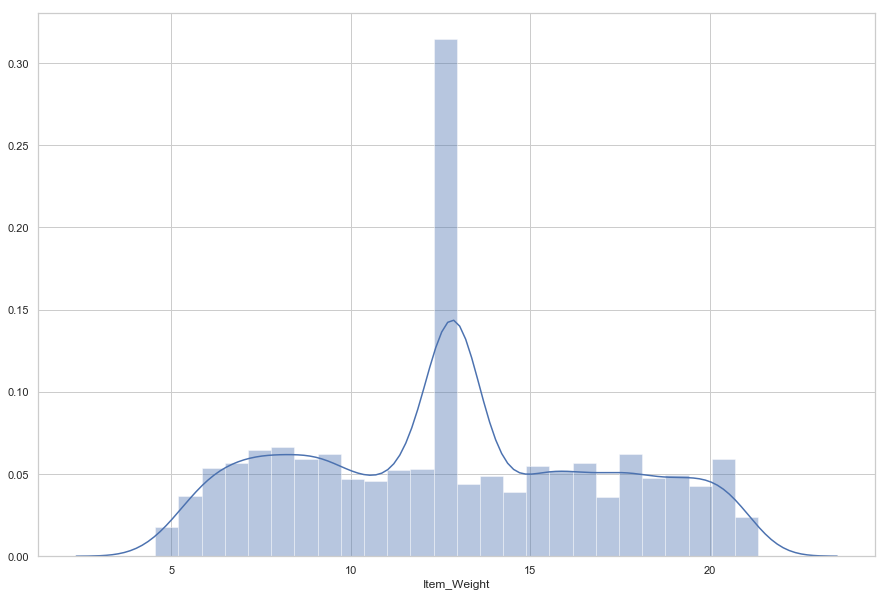

In [41]:
plt.figure(figsize=(15,10))
ax=sns.distplot(train.Item_Weight)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


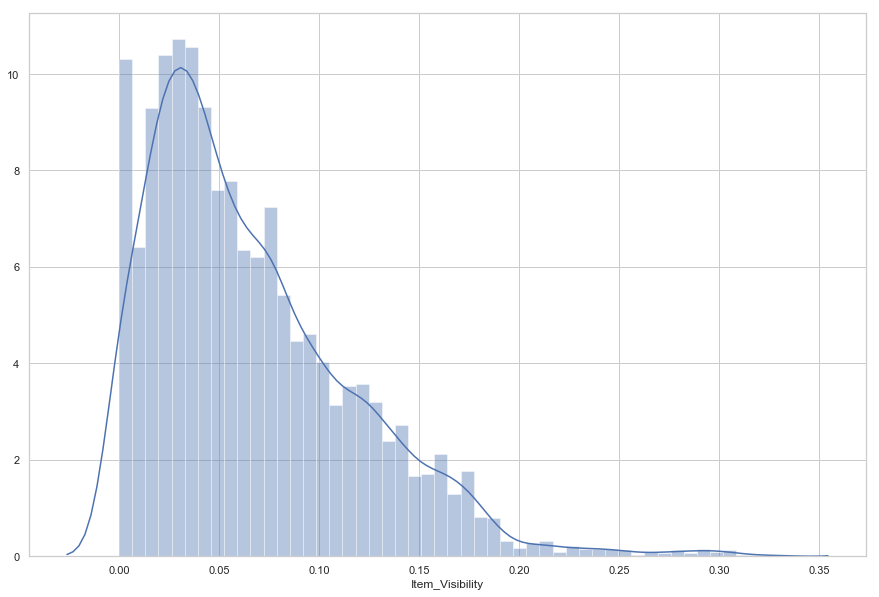

In [42]:
plt.figure(figsize=(15,10))
ax=sns.distplot(train.Item_Visibility)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


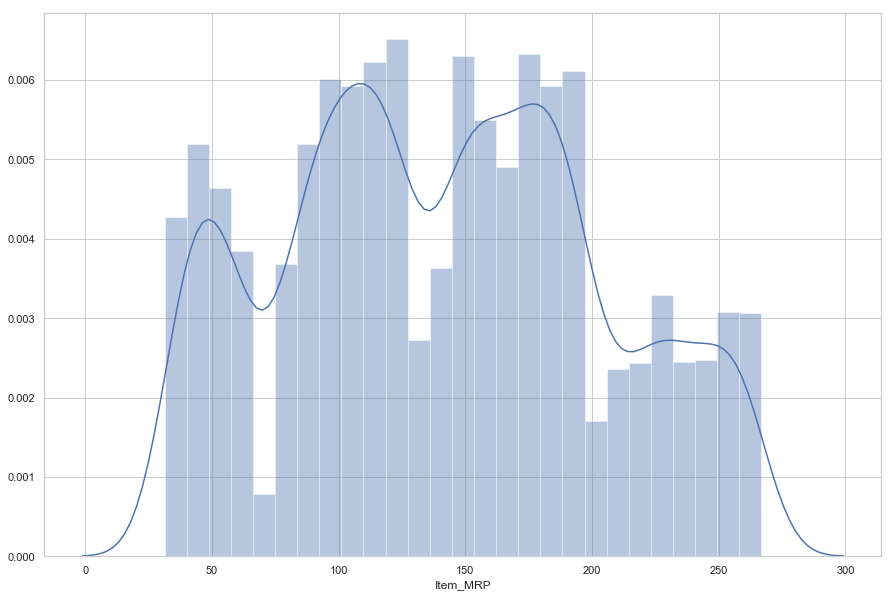

In [43]:
plt.figure(figsize=(15,10))
ax=sns.distplot(train.Item_MRP)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


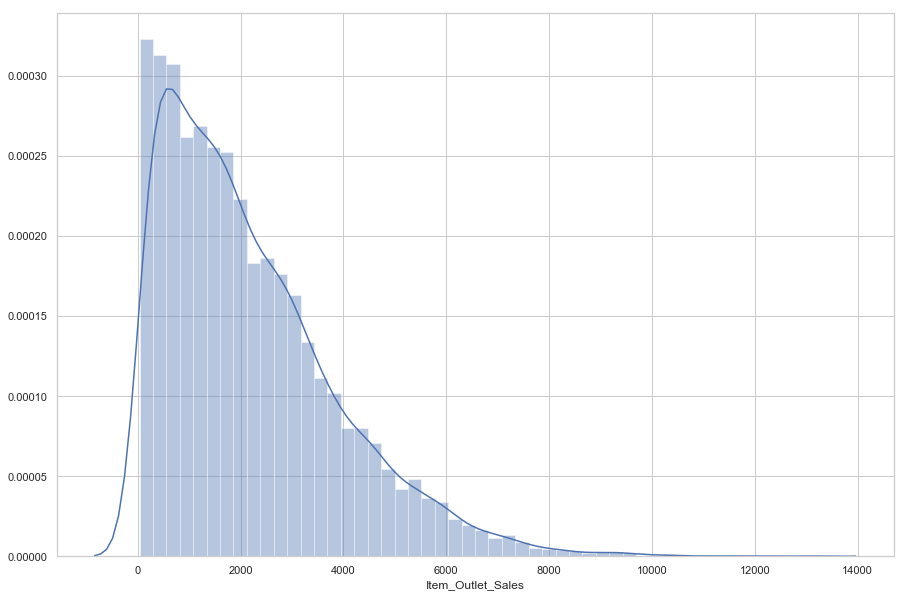

In [44]:
plt.figure(figsize=(15,10))
ax=sns.distplot(train.Item_Outlet_Sales)

In [45]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


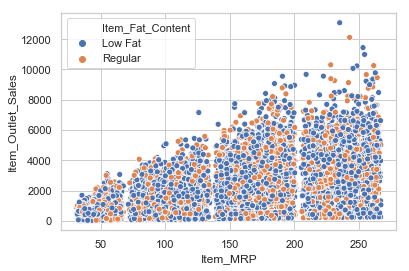

In [46]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=train)

In [47]:
combine = [train, test]
for dataset in combine:
    dataset['New_Outlet_Type'] = dataset.Outlet_Type.replace(['Supermarket Type1','Supermarket Type2','Supermarket Type3'], 'Supermarket')
  


In [48]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Supermarket
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Supermarket
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Supermarket
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Supermarket


In [49]:
train['Number_Of_Sold_Items'] = train['Item_Outlet_Sales'] / train['Item_MRP']
  

In [50]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Outlet_Type,Number_Of_Sold_Items
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Supermarket,14.951963
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Supermarket,9.186454
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Supermarket,14.809346
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Grocery Store,4.021967
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Supermarket,18.467868
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Supermarket,10.828796
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,Supermarket,5.958376
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,Supermarket,37.330006
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,Supermarket,11.102091
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,Supermarket,25.079863


In [51]:
train['Outlet_Size'].fillna('Medium',inplace=True)

In [52]:
print(pd.isnull(train).sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
New_Outlet_Type              0
Number_Of_Sold_Items         0
dtype: int64


In [1]:
test.head(25)

NameError: name 'test' is not defined

In [54]:
train['New_Item_Type']= train.Item_Identifier.str[:2]
train['New_Item_Type'] = train['New_Item_Type'].map({'FD': 'Food & Diary','DR': 'Drinks','NC': 'Non Edible'})
  

In [55]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Outlet_Type,Number_Of_Sold_Items,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Supermarket,14.951963,Food & Diary
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Supermarket,9.186454,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Supermarket,14.809346,Food & Diary
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Grocery Store,4.021967,Food & Diary
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Supermarket,18.467868,Non Edible


In [61]:
train.loc[train['New_Item_Type']=="Non Edible",'Item_Fat_Content'] = "NIL"

In [62]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Outlet_Type,Number_Of_Sold_Items,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Supermarket,14.951963,Food & Diary
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Supermarket,9.186454,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Supermarket,14.809346,Food & Diary
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Grocery Store,4.021967,Food & Diary
4,NCD19,8.93,NIL,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Supermarket,18.467868,Non Edible


In [63]:
train.Item_Visibility.replace(to_replace=0.0 , value=train.Item_Visibility.mean(), inplace=True)

In [64]:
train.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Outlet_Type,Number_Of_Sold_Items,New_Item_Type
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Supermarket,14.951963,Food & Diary
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Supermarket,9.186454,Drinks
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Supermarket,14.809346,Food & Diary
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Grocery Store,4.021967,Food & Diary
4,NCD19,8.930000,NIL,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Supermarket,18.467868,Non Edible
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Supermarket,10.828796,Food & Diary
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,Supermarket,5.958376,Food & Diary
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,Supermarket,37.330006,Food & Diary


In [ ]:
train = df[df.Status == "train"]
test = df[df.Status == 'test']